# теоритическая модель к-средних
K-means представляет собой алгоритм на основе центроид (средней точки кластера).
$$C = \frac{1}{n}\sum_{i=1}^n x_i$$

Алгоритм состоит из следующих шагов:
1. Инициализация центроидов
2. Обновление состава кластеров, то есть приписывание объекта к тому кластеру, центроид которого расположен ближе к этому объекту.
3. Обновление положения самих центроидов, то есть пересчитывание положения центроидов, как центра масс объектов, которые лежат в соответствующем кластере.
4. Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила останова

Для K-means нужно заранее знать число кластеров => возникает задача поиска оптимально числа кластеров.

Метод локтя

Метод силуэта

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection

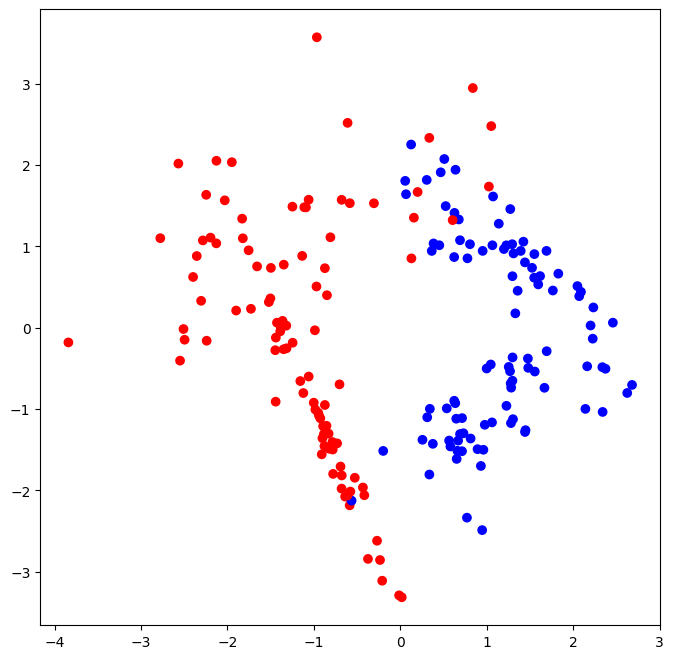

In [ ]:
classes = datasets.make_classification(
    n_samples=200,
    n_features=2, 
    n_informative=2,
    n_classes=2, 
    n_redundant=0,
    random_state=2
)

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()


In [42]:
class Logistic_Regression():
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.w = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, w, X, y):
        l = X.shape[1]
        z = w.T @ X
        a = self.sigmoid(z)
        
        loss = -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / l
        grad = (X @ (a - y).T) / l
        return loss, grad

    def add_bias(self, X):
        bias_row = np.ones((1, X.shape[1]))
        return np.vstack([bias_row, X])

    def optimize(self, X, y):
        X_with_bias = self.add_bias(X)
        self.w = np.zeros((X_with_bias.shape[0], 1))
        
        losses = []
        
        for i in range(self.max_iterations):
            loss, grad = self.log_loss(self.w, X_with_bias, y)
            self.w -= self.learning_rate * grad
            losses.append(loss)

        return self.w, losses

    def predict(self, X, threshold=0.5):
        X_with_bias = self.add_bias(X)
        y_pred = self.sigmoid(self.w.T @ X_with_bias)
        return (y_pred >= threshold).astype(int)


In [43]:
np.random.seed(42)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (140, 2)
Размер массива признаков тестовой выборки (60, 2)
Размер массива ответов для обучающей выборки (140,)
Размер массива ответов для тестовой выборки (60,)


In [44]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [56]:
n_iterations = 1000
eta = 0.05

model = Logistic_Regression(eta, n_iterations)

w, losses = model.optimize( X_train_tr, y_train_tr)

y_predicted_test = model.predict(X_test_tr)
y_predicted_train = model.predict(X_train_tr)

# В качестве меры точности возьмём долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

print(classification_report(y_test, y_predicted_test.flatten(),
                          target_names=['Класс 0', 'Класс 1'],
                          digits=3))

Итоговый вектор весов w: [[-0.21084616]
 [ 3.30869452]
 [-0.16462154]]
Точность на обучающей выборке: 92.857
Точность на тестовой выборке: 91.667
              precision    recall  f1-score   support

     Класс 0      0.969     0.886     0.925        35
     Класс 1      0.857     0.960     0.906        25

    accuracy                          0.917        60
   macro avg      0.913     0.923     0.916        60
weighted avg      0.922     0.917     0.917        60



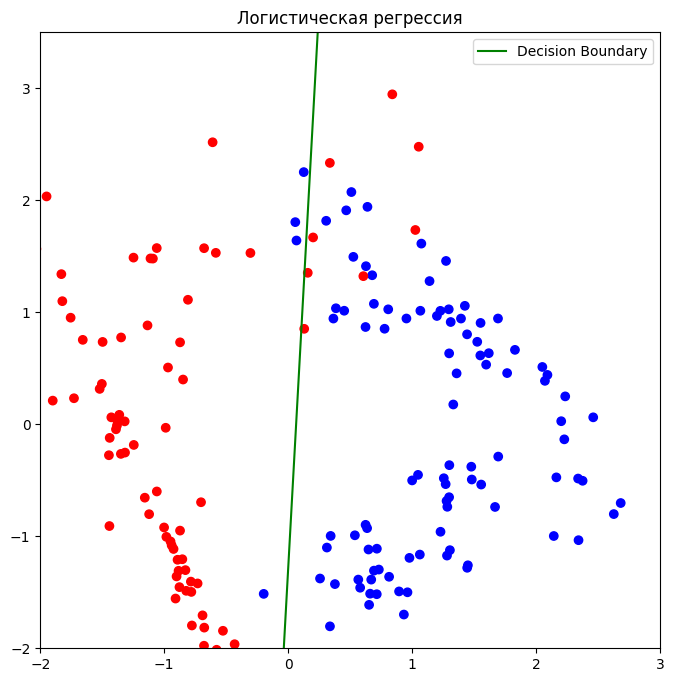

In [46]:
plt.figure(figsize=(8, 8))
colors = ListedColormap(['red', 'blue'])

plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

x_values = np.linspace(-2, 2, 100)

y_values = - (w[1] * x_values + w[0]) / w[2]

plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.legend()
plt.ylim(-2, 3.5)
plt.xlim(-2, 3)
plt.title("Логистическая регрессия")
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_train_tree = tree_model.predict(X_train)
y_pred_test_tree = tree_model.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, y_pred_train_tree):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test_tree):.3f}")
print(classification_report(y_test, y_pred_test_tree, target_names=['Класс 0', 'Класс 1']))

Train accuracy: 0.979
Test accuracy: 0.950
              precision    recall  f1-score   support

     Класс 0       0.97      0.94      0.96        35
     Класс 1       0.92      0.96      0.94        25

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



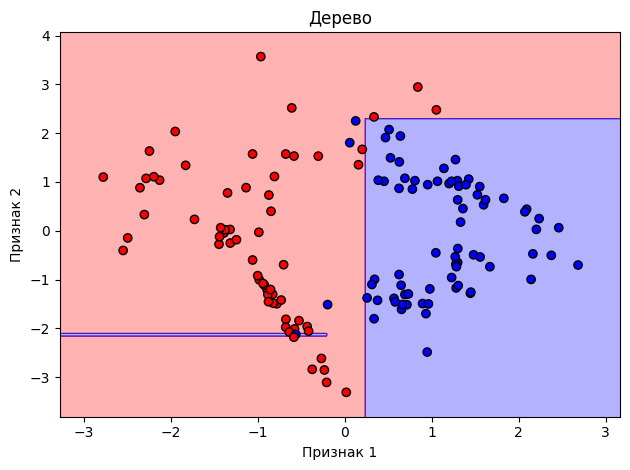

In [48]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=colors)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colors, edgecolors='k')
plt.title("Дерево")
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_train_forest = forest_model.predict(X_train)
y_pred_test_forest = forest_model.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, y_pred_train_forest):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test_forest):.3f}")
print(classification_report(y_test, y_pred_test_forest, target_names=['Класс 0', 'Класс 1']))

Train accuracy: 0.993
Test accuracy: 0.933
              precision    recall  f1-score   support

     Класс 0       0.97      0.91      0.94        35
     Класс 1       0.89      0.96      0.92        25

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



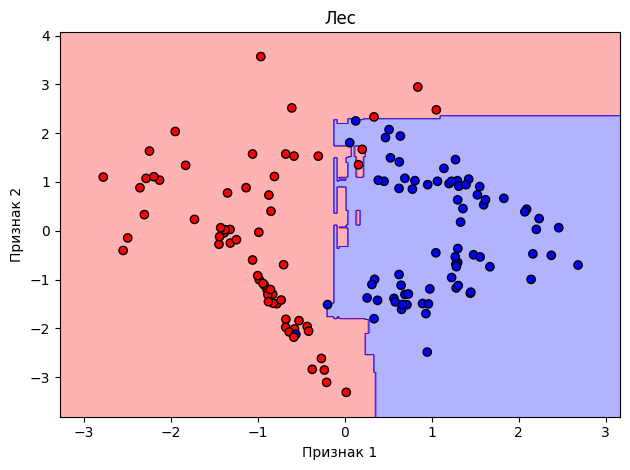

In [38]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=colors)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colors, edgecolors='k')
plt.title("Лес")
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()

# +    Метрики для проверки качества алгоритмов регрессии

$$Q(a,x) = MAE = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|$$
$$Q(a,x) = MSE = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}$$
$$ R^2 = 1 - \frac{\sum_{i=1}^N (y_i - y_{pred}(x_i))^2}{\sum_{i=1}^N (y_i - y_{\text{mean}}) }$$